In [1]:
import os
import sys
import urllib.request
import json
import re
from collections import Counter

from matplotlib import font_manager, rc
from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import Text
import pandas as pd
from pandas import DataFrame

import time
from selenium import webdriver
from selenium.webdriver import Keys
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import os
import sys
import urllib.request
import json
import re
from collections import Counter

okt = Okt()

In [2]:
def get_blog_review(word, num):
    num = num * 100 + 1
    client_id = "bdpWYU7e70Thq9gFsYAU"
    client_secret = "9JU2hmkHTD"

    encText = urllib.parse.quote(word)
    url = "https://openapi.naver.com/v1/search/blog?query=" + encText +"&display=100"+"&start="+str(num) # json 결과
    body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}";

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if(rescode==200):
        response_body = response.read()
        response_body = json.loads(response_body)
        result_data = response_body['items']
        de_list = []
        de_list_link = []
        for index, item in enumerate(response_body['items']):
            tmp_data = re.sub(r'[0-9|<|>|b|\/]+', '', item['description'])
            tmp_data_link = item['link']
            de_list.append(tmp_data)
            de_list_link.append(tmp_data_link)
    else:
        print("Error Code:" + rescode)

    return de_list

In [3]:
def generation_vocab(data, name, num):
    tmp_list = []
    for i in range(0, num):
        tmp_list = tmp_list + get_blog_review(name, i)
    df = pd.DataFrame(tmp_list)
    df.to_csv('./data/blog_review({}_{}개).csv'.format(name, num*100), encoding='utf-8-sig')
    return tmp_list

In [4]:
def make_wordcloud_graph(data):
    text_list = []
    for x in range(0, len(data)):
        tmp = data[x]
        myList = okt.pos(tmp, norm=True, stem=True)  # 모든 형태소 추출
        myList_filter = [x for x, y in myList if y in ['Noun']]  # 추출된 값 중 동사만 추출
        text_list.append(myList_filter)
    tmp_list = sum(text_list, [])
    count = Counter(tmp_list)
    words = (dict(count.most_common()))
    Okt = Text(tmp_list, name="Okt")
    wordInfo = dict()
    for tags, counts in Okt.vocab().most_common(50):
        if (len(str(tags)) > 1):
            wordInfo[tags] = counts
    values = sorted(wordInfo.values(), reverse=True)
    keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
    font_location = "C:\\Windows\\Fonts\\malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    rc('font', family=font_name)
    plt.bar(range(len(wordInfo)), values, align='center')
    plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
    plt.show()
    wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
    plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
    plt.axis("off")
    plt.show()

In [5]:
def final(word):
    data = get_blog_review(word, 0)
    tmp = generation_vocab(data, word, 10)
    make_wordcloud_graph(tmp)
    

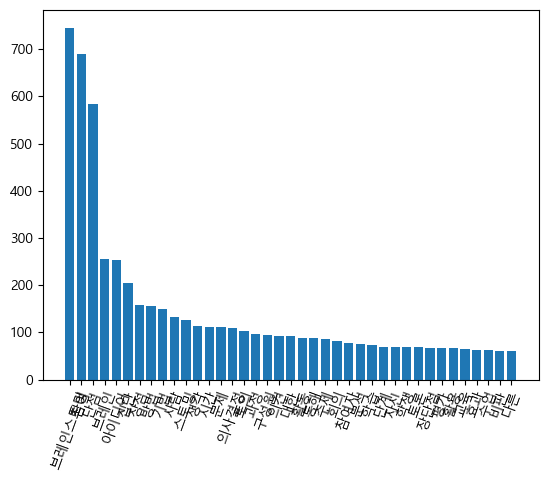

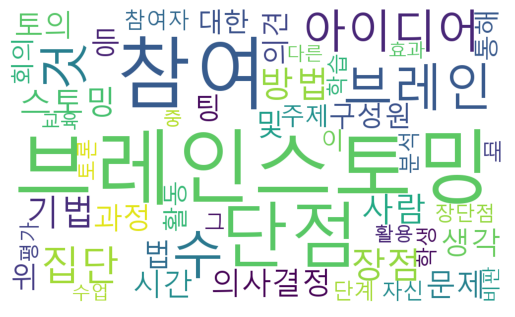

In [6]:
final('브레인스토밍+참여+단점')

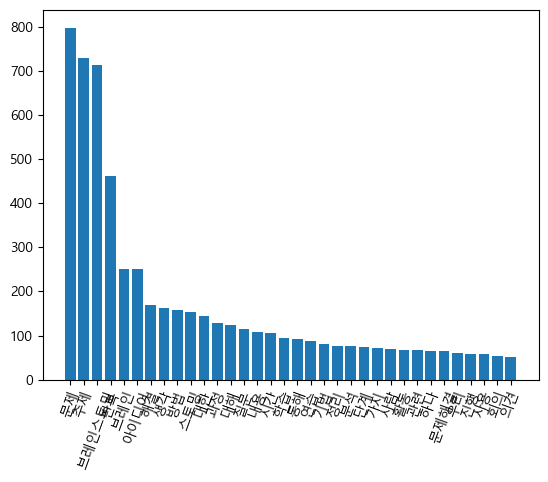

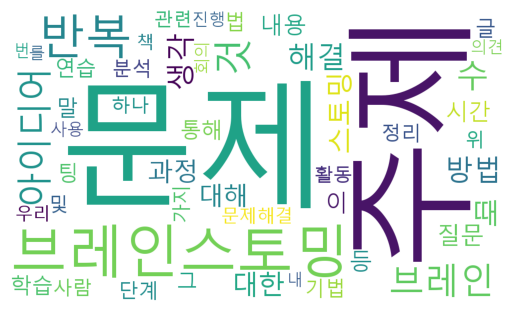

In [10]:
final('브레인스토밍+주제+반복+문제')

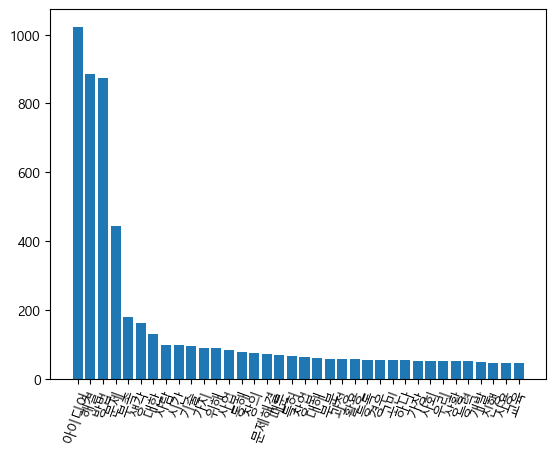

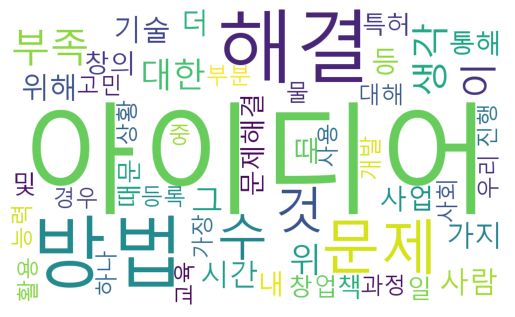

In [12]:
final('아이디어+부족+해결+방법')

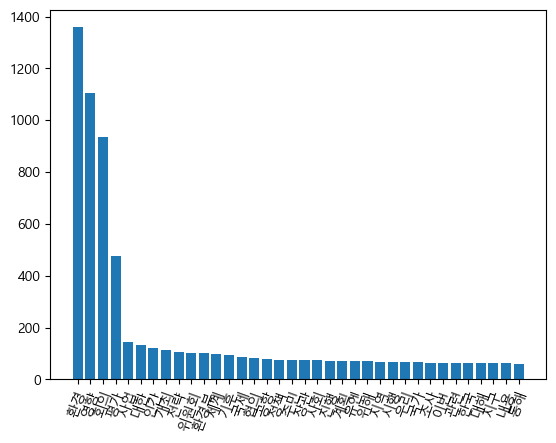

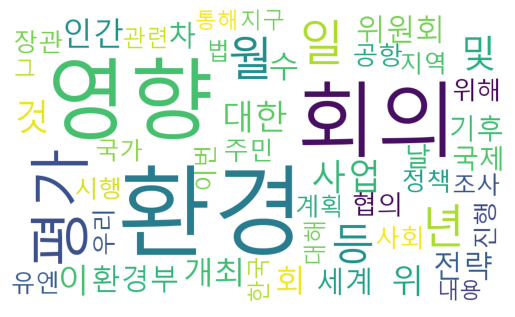

In [13]:
final('회의+환경+영향')

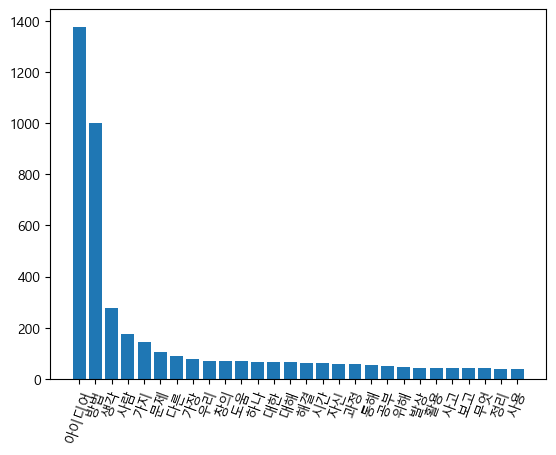

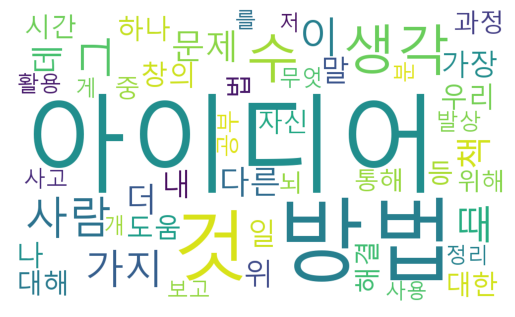

In [14]:
final('아이디어 떠올리는 방법')